Nonlinear Regrssion Section 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Visualize Data

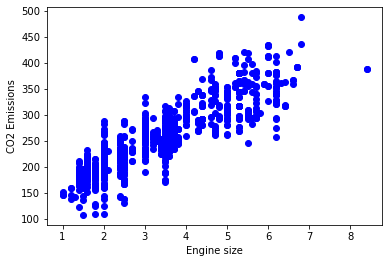

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')
plt.show()

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Training and testing 2nd Degree Polynomial Model (Quadratic)

In [5]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

poly_transformer = preprocessing.PolynomialFeatures(degree = 2)
x_train_transformed = poly_transformer.fit_transform(x_train)
x_test_transformed = poly_transformer.fit_transform(x_test)

model = linear_model.LinearRegression()
model.fit(x_train_transformed, y_train)
print('Coef: ', model.coef_)
print('Intercept: %.2f' % model.intercept_)
y_hat = model.predict(x_test_transformed)

print('MSE: %.2f' % np.mean((y_hat - y_test) ** 2))
print('MAE: %.2f' % np.mean(np.absolute(y_hat - y_test)))
print('R2-Score: %.2f' % metrics.r2_score(y_test, y_hat))

Coef:  [[ 0.         52.65340925 -1.88568202]]
Intercept: 104.22
MSE: 981.26
MAE: 24.21
R2-Score: 0.79


Text(0.5, 1.0, 'Training Data')

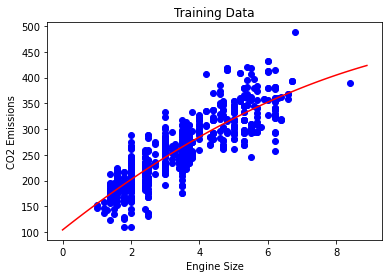

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 9.0, 0.1)
yy = model.intercept_ + model.coef_[0][1] * XX + model.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Training Data')

## 3rd Degree Polynomial (Cubic)

In [7]:
poly_transformer = preprocessing.PolynomialFeatures(degree = 3)
x_train_transformed = poly_transformer.fit_transform(x_train)
x_test_transformed = poly_transformer.fit_transform(x_test)

model = linear_model.LinearRegression()
model.fit(x_train_transformed, y_train)
print('Coef: ', model.coef_)
print('Intercept: %.2f' % model.intercept_)

y_hat = model.predict(x_test_transformed)

print('MSE: %.2f' % np.mean((y_hat - y_test) ** 2))
print('MAE: %.2f' % np.mean(np.absolute(y_hat - y_test)))
print('R2-Score: %.2f' % metrics.r2_score(y_test, y_hat))

Coef:  [[ 0.         35.65647461  2.89214769 -0.40491464]]
Intercept: 121.98
MSE: 973.90
MAE: 24.05
R2-Score: 0.79


Text(0.5, 1.0, 'Training Data')

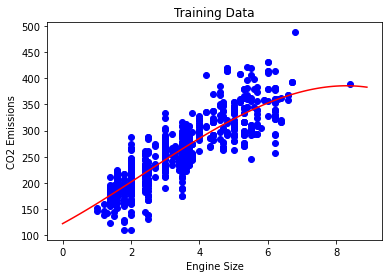

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 9.0, 0.1)
yy = model.intercept_ + model.coef_[0][1] * XX + model.coef_[0][2] * np.power(XX, 2) + model.coef_[0][3] * np.power(XX, 3)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Training Data')

In [9]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv')

df.head()
'''
Year: Year that the data was measured
Value: GDP of China that year
'''

'\nYear: Year that the data was measured\nValue: GDP of China that year\n'

## Visualize Data

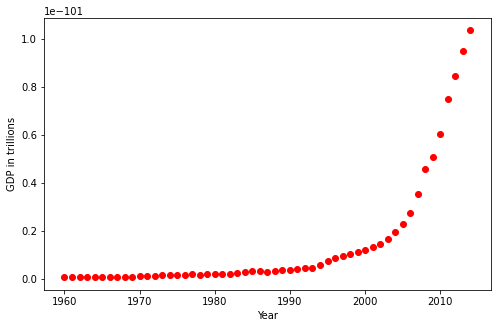

In [27]:
plt.figure(figsize=(8, 5))
x_data, y_data = (df['Year'].to_numpy(), df['Value'].to_numpy())
y_data /= (10 ** 12)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP in trillions')
plt.xlabel('Year')
plt.show()

## 4th Degree Regression

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

x_train = train[['Year']]
x_test = test[['Year']]
y_train = train[['Value']]
y_test = test[['Value']]

poly_transformer = preprocessing.PolynomialFeatures(degree = 4)
x_train_transformed = poly_transformer.fit_transform(x_train)
x_test_transformed = poly_transformer.fit_transform(x_test)

model = linear_model.LinearRegression()
model.fit(x_train_transformed, y_train)
print('Coef: ', model.coef_)
print('Intercept: %.2f' % model.intercept_)

y_hat = model.predict(x_test_transformed)

print('MSE: %.2f' % np.mean((y_hat - y_test) ** 2))
print('MAE: %.2f' % np.mean(np.absolute(y_hat - y_test)))
print('R2-Score: %.2f' % metrics.r2_score(y_test, y_hat))

Coef:  [[ 0.00000000e+00  5.70077199e+08  7.47462890e+11 -5.03563623e+08
   9.54123396e+04]]
Intercept: -487939656335363200.00
MSE: 329171842555787754864640.00
MAE: 454367893181.67
R2-Score: 0.96


![title](../../../QR_codes/Code-GA-3.png)